# Meteorite Analysis

In [1]:
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

%matplotlib inline

df = pd.read_csv('Meteorite_Landings.csv')

#Grab data from meteorites fallen to Earth
fallen = df[df['fall'] == 'Fell']

#Grab data from meteorites found on Earth
found = df[df['fall'] == 'Found']
fallen

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
1106,Zhuanghe,30408,Valid,H5,2900.0,Fell,1976.0,39.66667,122.98333,"(39.66667, 122.98333)"
1107,Zmenj,30411,Valid,Howardite,246.0,Fell,1858.0,51.83333,26.83333,"(51.83333, 26.83333)"
1108,Zomba,30412,Valid,L6,7500.0,Fell,1899.0,-15.18333,35.28333,"(-15.18333, 35.28333)"
1109,Zsadany,30413,Valid,H5,552.0,Fell,1875.0,46.93333,21.50000,"(46.93333, 21.5)"


In [2]:
found

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
37,Northwest Africa 5815,50693,Valid,L5,256.8,Found,NaN,0.00000,0.00000,"(0.0, 0.0)"
520,Cumulus Hills 04075,32531,Valid,Pallasite,9.6,Found,2003.0,NaN,NaN,NaN
757,Dominion Range 03239,32591,Valid,L6,69.5,Found,2002.0,NaN,NaN,NaN
804,Dominion Range 03240,32592,Valid,LL5,290.9,Found,2002.0,NaN,NaN,NaN
1111,Abajo,4,Valid,H5,331.0,Found,1982.0,26.80000,-105.41667,"(26.8, -105.41667)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


In [3]:
clean_fallen = fallen.dropna(how='any', axis=0)
clean_found = found.dropna(how='any', axis=0)
clean_fallen = clean_fallen.drop(columns='GeoLocation')
clean_found = clean_found.drop(columns='GeoLocation')
clean_fallen = clean_fallen[(clean_fallen['reclat'] != 0.0) & (clean_fallen['reclong'] != 0.0)]
clean_found = clean_found[(clean_found['reclat'] != 0.0) & (clean_found['reclong'] != 0.0)]

clean_fallen

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000
...,...,...,...,...,...,...,...,...,...
1106,Zhuanghe,30408,Valid,H5,2900.0,Fell,1976.0,39.66667,122.98333
1107,Zmenj,30411,Valid,Howardite,246.0,Fell,1858.0,51.83333,26.83333
1108,Zomba,30412,Valid,L6,7500.0,Fell,1899.0,-15.18333,35.28333
1109,Zsadany,30413,Valid,H5,552.0,Fell,1875.0,46.93333,21.50000


In [4]:
clean_found

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong
1111,Abajo,4,Valid,H5,331.00,Found,1982.0,26.80000,-105.41667
1112,Abar al' Uj 001,51399,Valid,H3.8,194.34,Found,2008.0,22.72192,48.95937
1113,Abbott,5,Valid,H3-6,21100.00,Found,1951.0,36.30000,-104.28333
1114,Abernathy,7,Valid,L6,2914.00,Found,1941.0,33.85000,-101.80000
1115,Abo,8,Valid,H,1.20,Found,1840.0,60.43333,22.30000
...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.00,Found,1990.0,29.03700,17.01850
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.00,Found,1999.0,13.78333,8.96667
45713,Zlin,30410,Valid,H4,3.30,Found,1939.0,49.25000,17.66667
45714,Zubkovsky,31357,Valid,L6,2167.00,Found,2003.0,49.78917,41.50460


In [5]:
fallen_desc = clean_fallen.describe()
fallen_desc

,id,mass (g),year,reclat,reclong
count,1063.000000,1.063000e+03,1063.000000,1063.000000,1063.000000
mean,16484.643462,4.758984e+04,1913.874882,30.171940,20.310107
std,10527.360498,7.210902e+05,74.778218,22.992631,69.458340
min,1.000000,1.000000e-01,860.000000,-44.116670,-157.866670
25%,10079.500000,7.000000e+02,1875.500000,22.016665,-4.525000
50%,15422.000000,2.900000e+03,1924.000000,36.100000,20.233330
75%,23109.000000,1.050000e+04,1964.000000,46.058335,76.465835
max,57168.000000,2.300000e+07,2013.000000,66.348330,174.400000


In [6]:
found_desc = clean_found.describe()
found_desc

,id,mass (g),year,reclat,reclong
count,30642.000000,3.064200e+04,30642.000000,30642.000000,30642.000000
mean,20899.679884,1.767045e+04,1989.626885,-50.300061,75.296171
std,15083.468192,6.881301e+05,18.880188,44.971897,83.256050
min,4.000000,0.000000e+00,1575.000000,-87.366670,-165.433330
25%,9174.250000,6.200000e+00,1984.000000,-79.683330,35.666670
50%,18678.500000,2.718500e+01,1992.000000,-72.774722,57.311555
75%,27949.750000,1.679925e+02,2000.000000,-24.850000,159.666670
max,57455.000000,6.000000e+07,2012.000000,81.166670,178.200000


In [7]:
fallen_invalids = clean_fallen[(clean_fallen == 'Relict').any(axis=1)]
fallen_invalids #No invalids

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong


In [8]:
found_invalids = clean_found[(clean_found == 'Relict').any(axis=1)]
found_invalids #A relict meteorite that cannot be assigned easily to a class

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong
6818,David Glacier 92308,6614,Relict,Chondrite-fusion crust,1.700,Found,1992.0,-75.31667,162.00000
12640,Gove,52859,Relict,Relict iron,0.000,Found,1979.0,-12.26333,136.83833
20679,Lewis Cliff 87241,13702,Relict,Chondrite-fusion crust,0.500,Found,1987.0,-84.34563,161.31058
23094,Meteorite Hills 001139,45809,Relict,Fusion crust,0.013,Found,2000.0,-79.68333,159.75000
31061,Österplana 048,56147,Relict,Relict OC,0.000,Found,2004.0,58.58333,13.43333
31062,Österplana 049,56148,Relict,Relict OC,0.000,Found,2012.0,58.58333,13.43333
31063,Österplana 050,56149,Relict,Relict OC,0.000,Found,2003.0,58.58333,13.43333
31064,Österplana 051,56150,Relict,Relict OC,0.000,Found,2006.0,58.58333,13.43333
31065,Österplana 052,56151,Relict,Relict OC,0.000,Found,2006.0,58.58333,13.43333
31066,Österplana 053,56152,Relict,Relict OC,0.000,Found,2002.0,58.58333,13.43333


In [9]:
clean_fallen = clean_fallen[(clean_fallen.nametype != 'Relict')]
clean_fallen['year'] = clean_fallen['year'].astype(int)
clean_fallen = clean_fallen[(clean_fallen.year <= 2022)]
clean_fallen

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000
...,...,...,...,...,...,...,...,...,...
1106,Zhuanghe,30408,Valid,H5,2900.0,Fell,1976,39.66667,122.98333
1107,Zmenj,30411,Valid,Howardite,246.0,Fell,1858,51.83333,26.83333
1108,Zomba,30412,Valid,L6,7500.0,Fell,1899,-15.18333,35.28333
1109,Zsadany,30413,Valid,H5,552.0,Fell,1875,46.93333,21.50000


In [10]:
clean_found = clean_found[(clean_found.nametype != 'Relict')]
clean_found['year'] = clean_found['year'].astype(int)
clean_found = clean_found[(clean_found.year <= 2022)]
clean_found

C:\Users\LD\AppData\Local\Temp\ipykernel_2948\310399641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_found['year'] = clean_found['year'].astype(int)


,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong
1111,Abajo,4,Valid,H5,331.00,Found,1982,26.80000,-105.41667
1112,Abar al' Uj 001,51399,Valid,H3.8,194.34,Found,2008,22.72192,48.95937
1113,Abbott,5,Valid,H3-6,21100.00,Found,1951,36.30000,-104.28333
1114,Abernathy,7,Valid,L6,2914.00,Found,1941,33.85000,-101.80000
1115,Abo,8,Valid,H,1.20,Found,1840,60.43333,22.30000
...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.00,Found,1990,29.03700,17.01850
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.00,Found,1999,13.78333,8.96667
45713,Zlin,30410,Valid,H4,3.30,Found,1939,49.25000,17.66667
45714,Zubkovsky,31357,Valid,L6,2167.00,Found,2003,49.78917,41.50460


In [11]:
#No need for these columns anymore
clean_fallen = clean_fallen.drop(columns='nametype')
clean_found = clean_found.drop(columns='nametype')
clean_fallen = clean_fallen.drop(columns='fall')
clean_found = clean_found.drop(columns='fall')

In [12]:
maximum_from_fallen = clean_fallen[(clean_fallen == clean_fallen['mass (g)'].max()).any(axis=1)]
maximum_from_fallen

,name,id,recclass,mass (g),year,reclat,reclong
920,Sikhote-Alin,23593,"Iron, IIAB",23000000.0,1947,46.16,134.65333


In [13]:
minimum_from_fallen = clean_fallen[(clean_fallen == clean_fallen['mass (g)'].min()).any(axis=1)]
minimum_from_fallen

,name,id,recclass,mass (g),year,reclat,reclong
1055,Vilna,24183,L5,0.1,1967,54.22500,-111.69167
1090,Yoshiki,30372,Stone-uncl,0.1,1928,34.16667,131.45000


In [14]:
maximum_from_found = clean_found[clean_found['mass (g)'] == clean_found['mass (g)'].max()]
maximum_from_found

,name,id,recclass,mass (g),year,reclat,reclong
16392,Hoba,11890,"Iron, IVB",60000000.0,1920,-19.58333,17.91667


In [15]:
minimum_from_found = clean_found[clean_found['mass (g)'] == clean_found['mass (g)'].min()]
minimum_from_found

,name,id,recclass,mass (g),year,reclat,reclong
42703,Yamato 8333,29438,H5,0.01,1983,-71.5,35.66667


In [16]:
# Functions to calculate a price for each meteorites, fallen and found
# ----------------------------------------------------------------------
# Martian and Lunar are worth $1k/gram
# Stone and Chondrites are worth $20/gram
# Pallasites and Mesosiderites are worth $12/grams
# Iron is worth $5/gram
# Anything else is worth $0.5/gram
#-----------------------------------------------------------------------
# CLASSIFICATIONS
#
# Chondrites = [CI, CM, CO, CV, CK, CR, CR, CH, CB,
#               H, L, LL, EH, EL, R, K, Howardite, Eucrite, Diogenite,
#               Angrite, Aubrite, Ureilite, Brachinite]
#
# Valuables = [Lunar, Martian]
#
# Mixed = [Pallasite, Mesosiderite]
# 
# Iron = [Iron]
#
# ----------------------------------------------------------------------- 
# Two columns to be used: recclass and mass (g)
#
# Such that if a meteorite['recclass'] falls in a certain class,
# Then calculate the price by its grams based on the classification

def meteorite_genclassifier(meteorite_recclass):
    if re.search(r'Lunar', meteorite_recclass, re.I):
        return 'MOON'
    elif re.search(r'Martian', meteorite_recclass, re.I):
        return 'MARS'
    elif re.search(r'O?C[0-9]?[A-Z]?', meteorite_recclass, re.I) \
        or re.search(r'\b[EHKLR][LH]?[0-9]?\b', meteorite_recclass, re.I) \
        or re.search(r'(?<!Pallas|Mesosider)ite', meteorite_recclass, re.I) \
        or re.search(r'Stone-ung', meteorite_recclass, re.I):
        return 'STONE'
    elif re.search(r'(Pallas|Mesosider)ite', meteorite_recclass, re.I):
        return 'STONY_IRON'
    elif re.search(r'Iron', meteorite_recclass, re.I):
        return 'IRON'
    else:
        return 'OTHER'

def price_tagger(meteorite_genclass):
    if meteorite_genclass['genclass'] in 'MOON' or meteorite_genclass['genclass'] in 'MARS':
        price = meteorite_genclass['mass (g)'] * 1000.0
        return price
    elif meteorite_genclass['genclass'] in 'STONE':
        price = meteorite_genclass['mass (g)'] * 20.0
        return price
    elif meteorite_genclass['genclass'] in 'STONY_IRON':
        price = meteorite_genclass['mass (g)'] * 12.0
        return price
    elif meteorite_genclass['genclass'] in 'IRON':
        price = meteorite_genclass['mass (g)'] * 5.0
        return price
    else:
        price = meteorite_genclass['mass (g)'] * 0.5
        return price

## This function takes more time!!
# def price_tagger2(meteorite):
#     if re.search(r'Lunar', meteorite['recclass'], re.I) or re.search(r'Martian', meteorite['recclass'], re.I):
#         price = meteorite['mass (g)'] * 1000.0
#         return price

#     elif re.search(r'O?C[0-9]?[A-Z]?', meteorite['recclass'], re.I) \
#         or re.search(r'\b[EHKLR][LH]?[0-9]?\b', meteorite['recclass'], re.I) \
#         or re.search(r'(?<!Pallas|Mesosider)ite', meteorite['recclass'], re.I) \
#         or re.search(r'Stone-ung', meteorite['recclass'], re.I):
#         price = meteorite['mass (g)'] * 20.0
#         return price

#     elif re.search(r'(Pallas|Mesosider)ite', meteorite['recclass'], re.I):
#         price = meteorite['mass (g)'] * 12.0
#         return price

#     elif re.search(r'Iron', meteorite['recclass'], re.I):
#         price = meteorite['mass (g)'] * 5.0
#         return price

#     else:
#         price = meteorite['mass (g)'] * 0.5
#         return price

# test = df.copy(deep=True)
# test['class'] = test['recclass'].apply(meteorite_genclassifier)
# test['price'] = test.apply(price_tagger, axis=1)
# #test['price'] = test.apply(price_tagger2, axis=1)
# test.head()
clean_fallen['genclass'] = clean_fallen['recclass'].apply(meteorite_genclassifier)
clean_fallen['price'] = clean_fallen.apply(price_tagger, axis=1)
clean_found['genclass'] = clean_found['recclass'].apply(meteorite_genclassifier)
clean_found['price'] = clean_found.apply(price_tagger, axis=1)

clean_fallen.head()

,name,id,recclass,mass (g),year,reclat,reclong,genclass,price
0,Aachen,1,L5,21.0,1880,50.77500,6.08333,STONE,420.0
1,Aarhus,2,H6,720.0,1951,56.18333,10.23333,STONE,14400.0
2,Abee,6,EH4,107000.0,1952,54.21667,-113.00000,STONE,2140000.0
3,Acapulco,10,Acapulcoite,1914.0,1976,16.88333,-99.90000,STONE,38280.0
4,Achiras,370,L6,780.0,1902,-33.16667,-64.95000,STONE,15600.0


In [17]:
clean_found.head()

,name,id,recclass,mass (g),year,reclat,reclong,genclass,price
1111,Abajo,4,H5,331.00,1982,26.80000,-105.41667,STONE,6620.0
1112,Abar al' Uj 001,51399,H3.8,194.34,2008,22.72192,48.95937,STONE,3886.8
1113,Abbott,5,H3-6,21100.00,1951,36.30000,-104.28333,STONE,422000.0
1114,Abernathy,7,L6,2914.00,1941,33.85000,-101.80000,STONE,58280.0
1115,Abo,8,H,1.20,1840,60.43333,22.30000,STONE,24.0


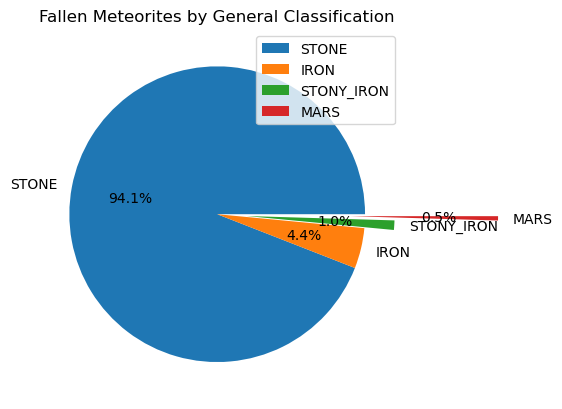

In [32]:


#TODO Do a better way to plot data using more of pyplot
plt.title("Fallen Meteorites by General Classification")
plt.pie(clean_fallen['genclass'].value_counts(), labels=clean_fallen['genclass'].unique(), autopct='%.1f%%', explode=(0,0,0.2,0.9))
plt.legend()


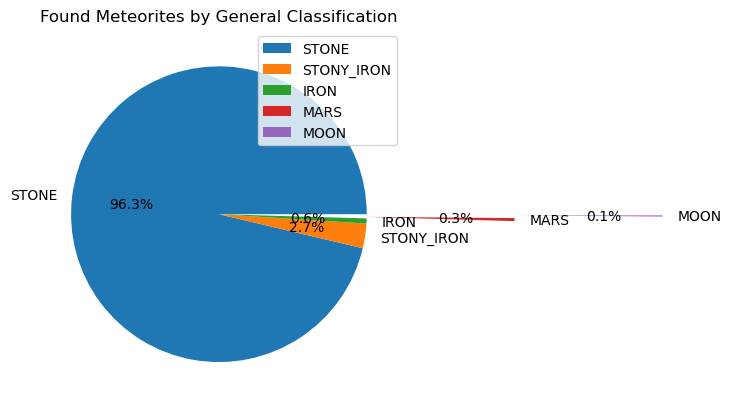

In [31]:
plt.title("Found Meteorites by General Classification")
plt.pie(clean_found['genclass'].value_counts(), labels=clean_found['genclass'].unique(), autopct='%.1f%%', explode=(0,0,0,1,2))
plt.legend()

(array([  1.,   0.,   0.,   0.,   1.,   2.,   6.,  15., 346., 692.]),
 array([ 860. ,  975.3, 1090.6, 1205.9, 1321.2, 1436.5, 1551.8, 1667.1,
        1782.4, 1897.7, 2013. ]),
 <BarContainer object of 10 artists>)

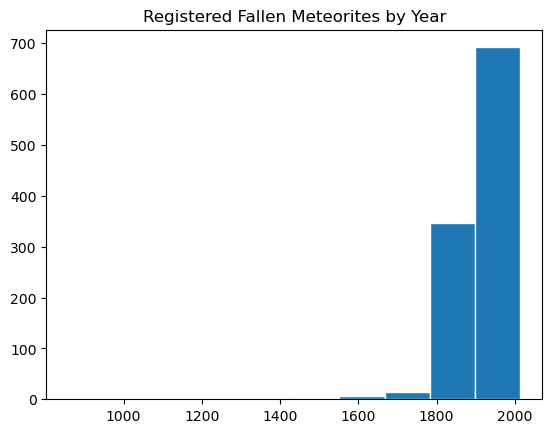

In [20]:
plt.title("Registered Fallen Meteorites by Year")
plt.hist(clean_fallen['year'], edgecolor='white', bins=10)


(array([2.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00, 6.0000e+00,
        2.2000e+01, 1.4200e+02, 3.6100e+02, 7.8600e+02, 2.9299e+04]),
 array([1575. , 1618.7, 1662.4, 1706.1, 1749.8, 1793.5, 1837.2, 1880.9,
        1924.6, 1968.3, 2012. ]),
 <BarContainer object of 10 artists>)

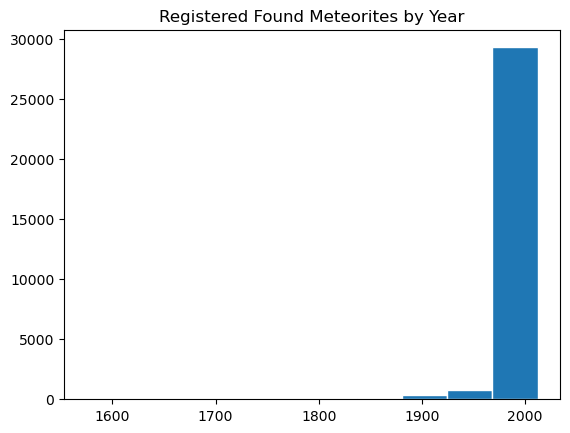

In [21]:
plt.title("Registered Found Meteorites by Year")
plt.hist(clean_found['year'], edgecolor='white', bins=10)

In [22]:
clean_found.groupby(['genclass']).size()

genclass
IRON            823
MARS             39
MOON            100
STONE         29488
STONY_IRON      171
dtype: int64

In [23]:
clean_found.describe()

,id,mass (g),year,reclat,reclong,price
count,30621.000000,3.062100e+04,30621.000000,30621.000000,30621.000000,3.062100e+04
mean,20878.951439,1.768257e+04,1989.616897,-50.358864,75.320107,2.292249e+05
std,15063.683758,6.883659e+05,18.881572,44.912573,83.266768,8.294327e+06
min,4.000000,1.000000e-02,1575.000000,-87.366670,-165.433330,2.000000e-01
25%,9170.000000,6.200000e+00,1984.000000,-79.683330,35.666670,1.240000e+02
50%,18670.000000,2.720000e+01,1992.000000,-72.774722,57.313330,5.468000e+02
75%,27936.000000,1.680000e+02,2000.000000,-24.850000,159.666670,3.440000e+03
max,57455.000000,6.000000e+07,2012.000000,81.166670,178.200000,7.200000e+08


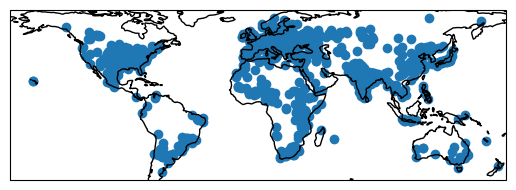

In [25]:
lon = clean_fallen['reclong']
lat = clean_fallen['reclat']
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())
ax.scatter(lon, lat)
ax.coastlines()